# Contains:
- Statistical analysis
- Transforming wrong data types
- Data visualisation
    - Numerical features
        - Heatmap showing correlation between features
        - Scaterplot showing correlation against target variable
        - Destribution of features
        - Distplot, Boxplot, probability plots of features 
    - Categorical features
        - countplot showing no of categories and density of each category

## Conclusion:
- Imbalanced data
- wrong data types
- outliers in some features
- extensive feature engg. needed
- no missing values, duplicate found

## Output:
- df with no missing values and corrected data types

### Importing Libraries

In [21]:
import pandas as pd
#pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Data

In [4]:
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('data/final_rcpi_dataset_noZV.txt', delimiter = "\t")

# remove unwanted column
df = df1.drop('smiles.solute',axis=1)
df.head()


,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,-1.15,1.6128,2.601124,36.7388,0,0,21,10.548938,8.664184,10.438653,6.664184,5.664184,346.449760,335.495801,339.281645,237.122297,183.292346,8,0,0,1,2,0,2,1,1,0,76,0.0,328.02,2,1,0.571429,9.0,4.839506,8.000000,0,2,0,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,6,0.500000,2.080084,1.788854,0.0,2.381102,3.301927,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.500000,1.000000,3,0,37.3,4.0,128.169250,16.498300,1.833144,4.749993,4.749993,0.0,108,6,2.057,34
1,-1.92,2.0167,4.067079,35.9129,0,0,23,10.548938,8.996276,9.770745,8.328368,6.996276,303.863246,286.834158,275.195845,232.239453,186.970253,8,0,0,1,0,0,3,3,0,0,83,0.0,412.02,2,0,0.857143,9.0,6.125000,5.877551,0,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,4,0.142857,2.874433,0.577350,0.0,2.406852,2.149140,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.428571,0.750000,5,0,26.3,4.0,130.185132,16.655024,1.850558,5.348035,5.348035,0.0,108,7,1.844,32
2,-0.22,0.3936,0.154921,30.9848,0,0,14,55.355967,14.981043,24.182657,30.704995,23.052319,364.987639,371.116808,409.234033,302.431889,173.784840,8,0,0,2,0,0,0,2,0,0,63,0.0,97.05,4,2,0.500000,9.0,3.920000,4.500000,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,3,4,0.000000,0.000000,0.000000,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,3,0,74.6,4.0,196.983795,16.327527,1.814170,11.893467,9.458406,0.0,96,8,-0.095,36
3,-0.23,0.0671,0.004502,27.9149,0,0,15,12.097876,9.328368,12.877306,9.992552,7.992552,283.041292,286.586007,321.633016,239.861731,144.940931,8,0,0,3,0,1,0,1,0,0,63,0.0,124.04,4,2,0.200000,9.0,3.920000,4.500000,0,0,1,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,4,0.000000,0.500000,1.650964,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.57,0.400000,0.666667,3,0,74.6,4.0,130.098944,16.327527,1.814170,9.458406,9.458406,0.0,96,8,-0.406,36
4,-4.23,2.9480,8.690704,45.0132,0,0,10,47.564750,17.758853,31.375344,50.610653,34.994162,690.236165,712.716278,807.763889,674.001616,345.217577,8,0,0,2,2,0,0,0,0,0,61,0.0,9.05,0,0,0.000000,9.0,3.920000,2.880000,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,6,4,4,0.000000,0.000000,0.000000,0.0,0.000000,1.650964,0.0,2.381102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,1,0,0.0,4.0,226.315572,16.322301,1.813589,11.954832,0.000000,0.0,92,10,4.068,36


### Statistical Analysis

In [5]:
df.shape

(8987, 115)

In [6]:
# Display summary statistics for a dataframe
df.describe()

,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
count,8987.000000,8987.000000,8.987000e+03,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000
mean,-3.156988,1.758562,9.162299e+00,71.718098,1.826972,1.881718,34.475242,28.747181,23.269722,33.256814,36.173541,33.239293,1153.468676,1334.176841,1851.481670,1849.230080,1535.637636,18.867030,0.031935,0.011572,1.093802,4.772004,1.005341,2.136419,2.538444,0.555469,0.192612,319.356849,0.509367,1165.046381,3.855792,1.284188,0.429473,15.021695,6.975731,4.706764,0.000111,1.531991,0.043062,2.820296,0.007344,0.282185,3.235229,1.034939,0.006454,0.039279,1.112496,2.029487,0.357516,0.378102,0.181596,0.007233,0.322911,0.076332,0.027707,0.105041,0.333148,0.197508,0.029932,0.102036,0.696117,1.319461,0.715255,0.026371,0.149549,0.000890,0.037832,0.004673,0.031490,0.065205,0.033270,0.005675,0.106932,0.371092,0.045510,0.011684,4.887059,9.049516,2.479137,0.343223,1.984588,1.860092,0.416032,6.140328,9.439950,0.797643,4.315973,0.780324,0.115382,0.516390,0.388961,0.139270,0.009129,0.069744,0.012903,0.260340,0.126533,0.037484,2.330783,0.461337,0.870920,4.533994,0.252365,65.735174,5.110939,266.547397,35.911821,1.970830,13.888268,7.180738,4.150282,964.698231,26.855124,2.018733,90.120841
std,2.116220,2.463825,2.070409e+01,29.921953,4.492370,4.696050,16.379415,26.535961,10.828081,17.932110,26.610364,32.062297,691.638630,869.898568,1397.131132,1602.629890,1504.159078,8.456933,0.199553,0.126939,1.178387,4.410167,1.450640,2.165754,3.943111,1.189908,0.555168,309.692368,0.288666,1499.724995,2.627118,1.465767,0.328433,6.265741,3.934441,3.837513,0.010549,1.675007,0.243850,3.975033,0.086680,0.809771,3.412033,1.860690,0.092944,0.229946,1.266918,2.227671,1.056194,0.895075,0.469838,0.104713,0.657348,0.336191,0.192244,0.423655,0.802605,0.502212,0.259034,0.397442,1.224749,1.251477,1.130793,0.174858,0.964943,0.036532,0.229946,0.085574,0.18

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Columns: 115 entries, logS_aq_avg to Zagreb
dtypes: float64(51), int64(64)
memory usage: 7.9 MB


In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features according to original data type : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features according to original data type: {}'.format(len(categorical_features), categorical_features))

We have 115 numerical features according to original data type : ['logS_aq_avg', 'ALogP', 'ALogp2', 'AMR', 'naAromAtom', 'nAromBond', 'nAtom', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'ATSp3', 'ATSp4', 'ATSp5', 'nB', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3', 'C2SP3', 'C3SP3', 'C4SP3', 'ECCEN', 'FMF', 'fragC', 'nHBAcc', 'nHBDon', 'HybRatio', 'Kier1', 'Kier2', 'Kier3', 'khs.sssB', 'khs.sCH3', 'khs.dCH2', 'khs.ssCH2', 'khs.tCH', 'khs.dsCH', 'khs.aaCH', 'khs.sssCH', 'khs.ddC', 'khs.tsC', 'khs.dssC', 'khs.aasC', 'khs.aaaC', 'khs.ssssC', 'khs.sNH2', 'khs.dNH', 'khs.ssNH', 'khs.aaNH', 'khs.tN', 'khs.dsN', 'khs.aaN', 'khs.sssN', 'khs.ddsN', 'khs.aasN', 'khs.sOH', 'khs.dO', 'khs.ssO', 'khs.aaO', 'khs.sF', 'khs.sssP', 'khs.dsssP', 'khs.sSH', 'khs.dS', 'khs.ssS', 'khs.aaS', 'khs.dssS', 'khs.ddssS', 'khs.sCl', 'khs.sBr', 'khs.sI', 'nAtomLC', 'nAtomP', 'nAtomLAC', 'MDEC.11', 'MDEC.12', 'MDEC.13', 'MDEC.14', 'MDEC.22', 'MDEC.23', 'MDEC.24', 'MDEC.33', 'MDEC.34', 'MD

### Transforming data types

- If number of unique values in any columns is less than 10 means that columns contains categorical data
- vice versa for continuous data

In [9]:
# continues_features
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print(continues_features)

['logS_aq_avg', 'ALogP', 'ALogp2', 'AMR', 'naAromAtom', 'nAromBond', 'nAtom', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'ATSp3', 'ATSp4', 'ATSp5', 'nB', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3', 'C2SP3', 'C3SP3', 'ECCEN', 'FMF', 'fragC', 'nHBAcc', 'nHBDon', 'HybRatio', 'Kier1', 'Kier2', 'Kier3', 'khs.sCH3', 'khs.ssCH2', 'khs.dsCH', 'khs.aaCH', 'khs.sssCH', 'khs.dssC', 'khs.aasC', 'khs.aaaC', 'khs.ssssC', 'khs.sOH', 'khs.dO', 'khs.ssO', 'khs.sF', 'khs.sCl', 'nAtomLC', 'nAtomP', 'nAtomLAC', 'MDEC.11', 'MDEC.12', 'MDEC.13', 'MDEC.14', 'MDEC.22', 'MDEC.23', 'MDEC.24', 'MDEC.33', 'MDEC.34', 'MDEC.44', 'MDEO.11', 'MDEO.12', 'MDEO.22', 'MDEN.11', 'MDEN.12', 'MDEN.13', 'MDEN.22', 'MDEN.23', 'MDEN.33', 'MLogP', 'PetitjeanNumber', 'topoShape', 'nRotB', 'TopoPSA', 'VAdjMat', 'MW', 'WTPT.1', 'WTPT.2', 'WTPT.3', 'WTPT.4', 'WTPT.5', 'WPATH', 'WPOL', 'XLogP', 'Zagreb']


In [10]:
# categorical features
categorical_features=[feature for feature in numeric_features if len(df[feature].unique())<=10]
print(categorical_features)

['C1SP1', 'C2SP1', 'C1SP2', 'C3SP3', 'C4SP3', 'khs.sssB', 'khs.dCH2', 'khs.tCH', 'khs.ddC', 'khs.tsC', 'khs.dssC', 'khs.sNH2', 'khs.dNH', 'khs.ssNH', 'khs.aaNH', 'khs.tN', 'khs.dsN', 'khs.aaN', 'khs.sssN', 'khs.ddsN', 'khs.aasN', 'khs.ssO', 'khs.aaO', 'khs.sssP', 'khs.dsssP', 'khs.sSH', 'khs.dS', 'khs.ssS', 'khs.aaS', 'khs.dssS', 'khs.ddssS', 'khs.sBr', 'khs.sI', 'LipinskiFailures']


In [11]:
df[categorical_features]

,C1SP1,C2SP1,C1SP2,C3SP3,C4SP3,khs.sssB,khs.dCH2,khs.tCH,khs.ddC,khs.tsC,khs.dssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.ssO,khs.aaO,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sBr,khs.sI,LipinskiFailures
0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,3,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,0,0,6,3,0,0,0,0,0,0,5,1,0,5,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
8983,0,0,7,1,0,0,0,0,0,0,6,0,0,3,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8984,0,0,5,3,0,0,0,0,0,0,5,1,0,5,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
8985,0,0,2,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3


In [12]:
# transform dtypes
df[categorical_features]=df[categorical_features].astype('O')
df[continues_features]=df[continues_features].astype('float')


In [13]:
# dtype corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Columns: 115 entries, logS_aq_avg to Zagreb
dtypes: float64(85), object(30)
memory usage: 7.9+ MB


In [15]:
# save df
df.to_csv("data/df1.csv")

## Data visualisation


### Visualisation of Numerical features

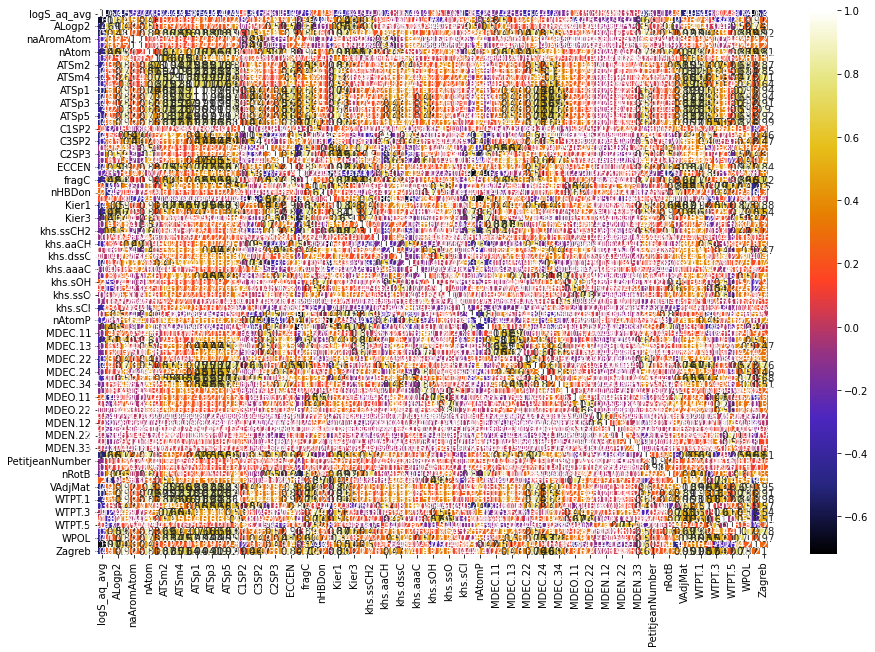

In [75]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [31]:
# null values count
df.isnull().sum().sum()

0

ValueError: num must be 1 <= num <= 40, not 41

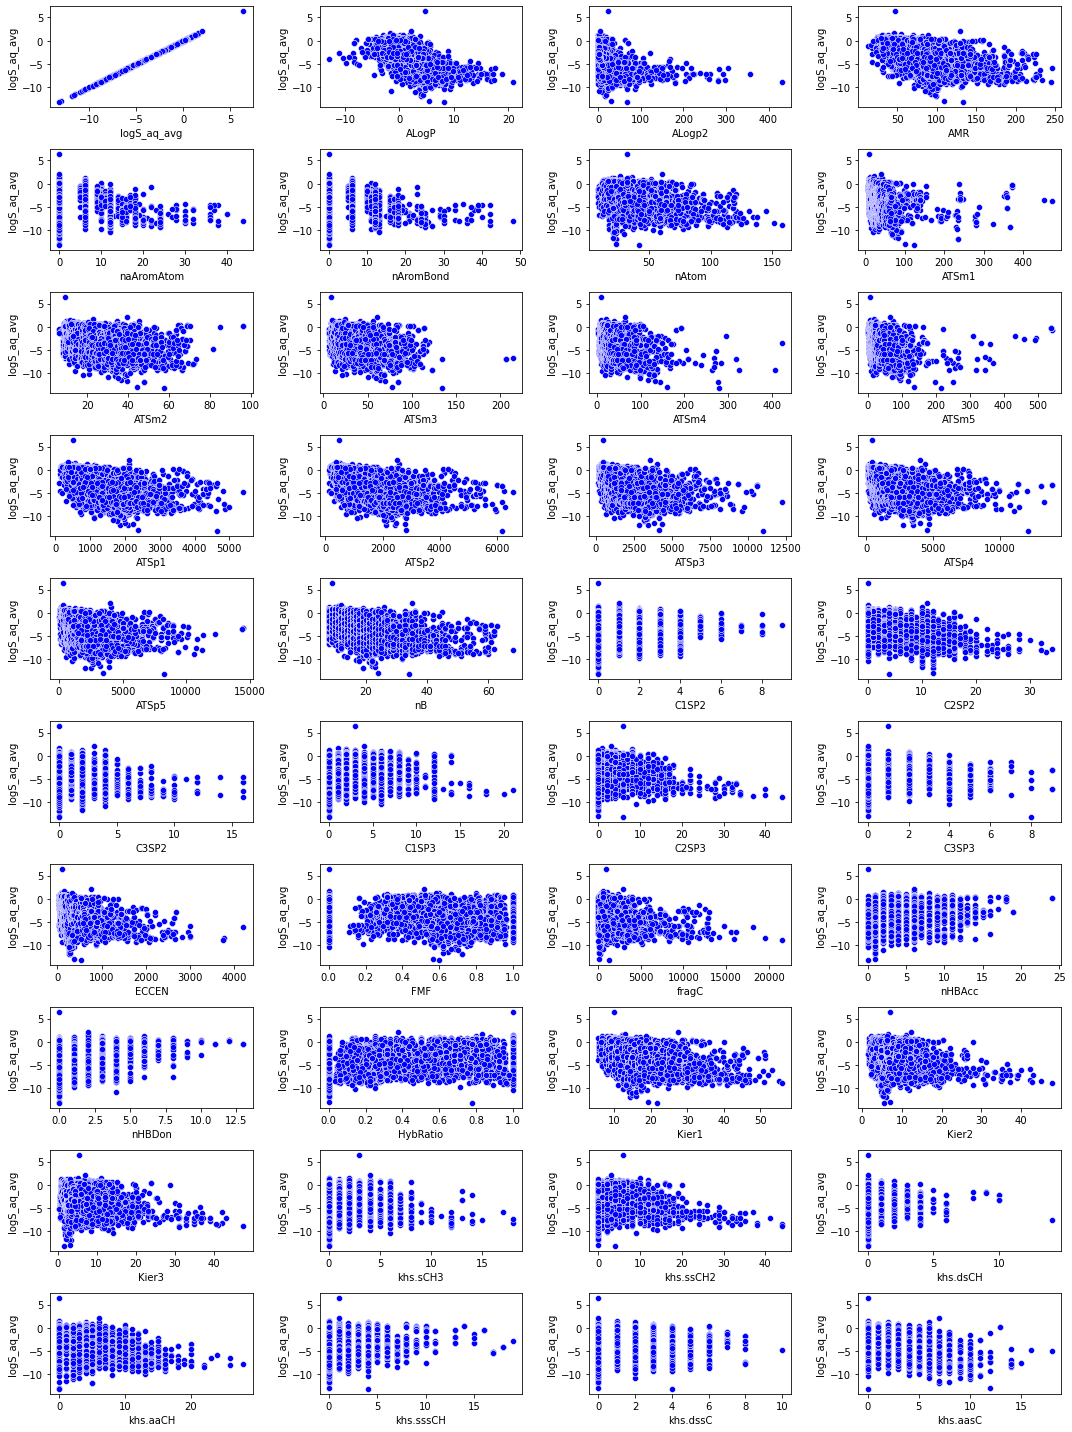

In [19]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(10, 4, i+1)

    sns.scatterplot(data= df ,y='logS_aq_avg', x=continues_features[i], color='b')
    plt.tight_layout()

Univarient analysis on numerical feaatures

ValueError: num must be 1 <= num <= 40, not 41

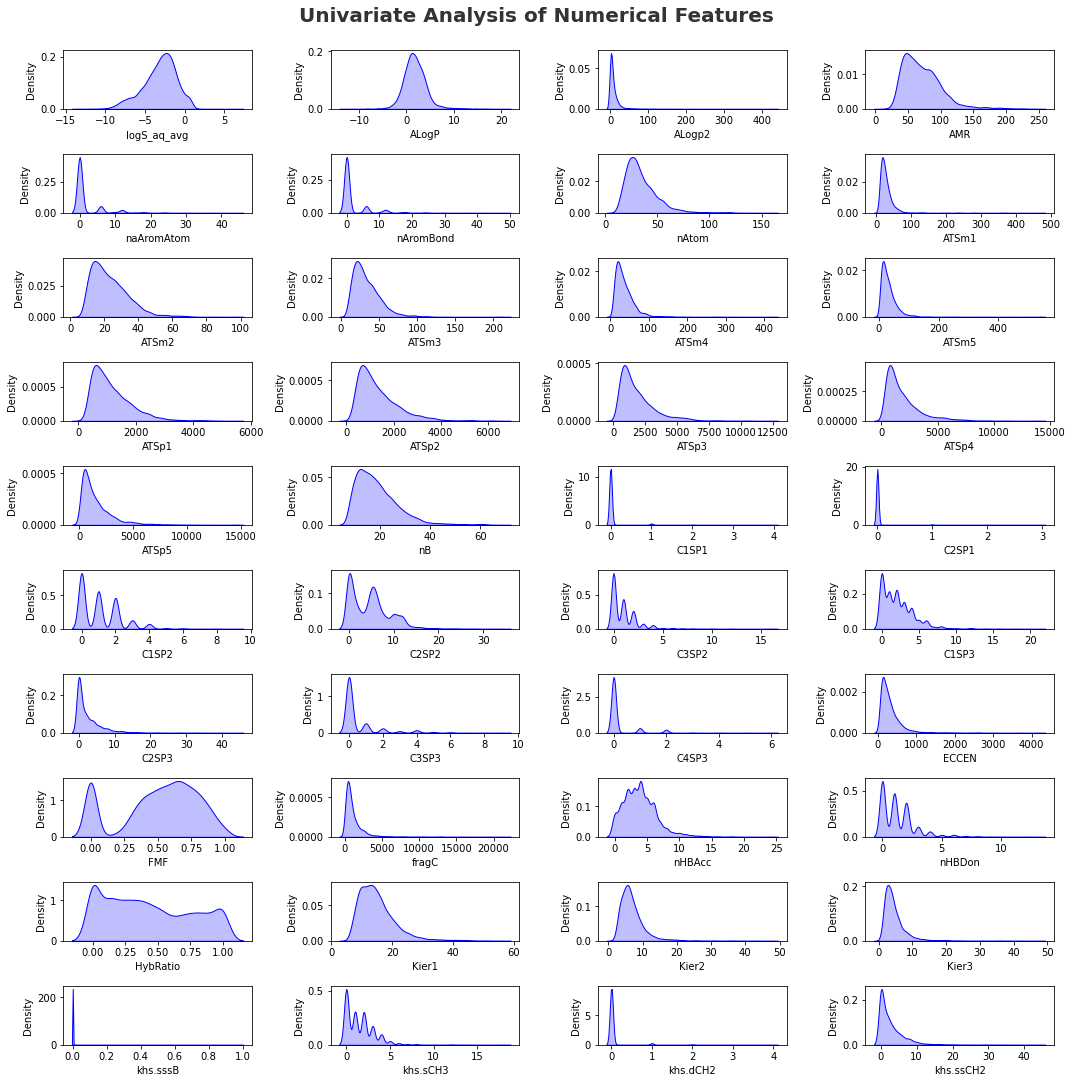

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(10, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [29]:
continues_features[1:5]

['ALogP', 'ALogp2', 'AMR', 'naAromAtom']

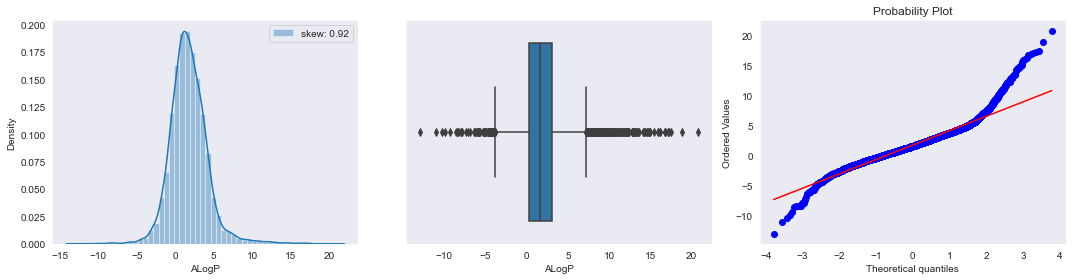

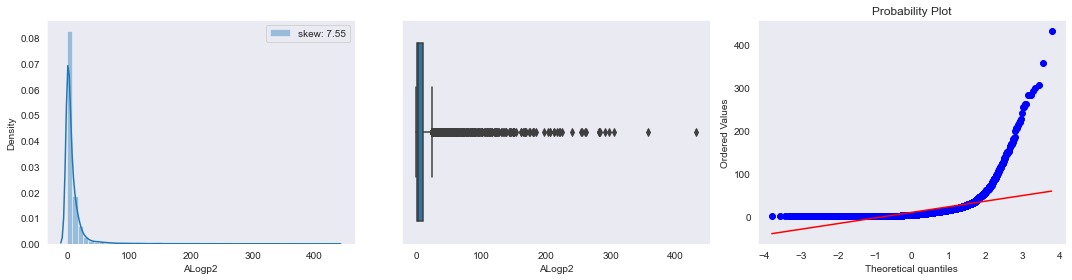

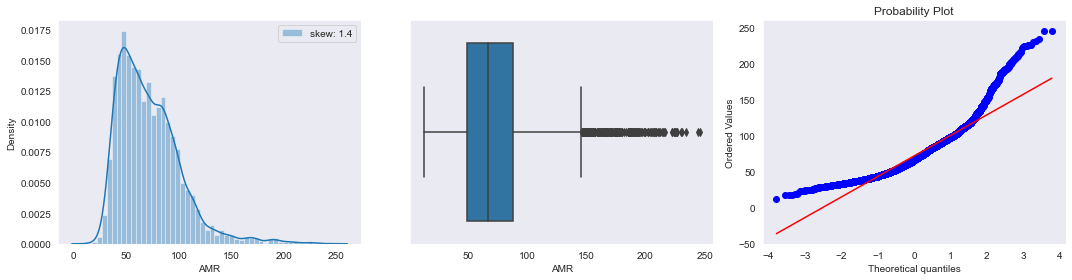

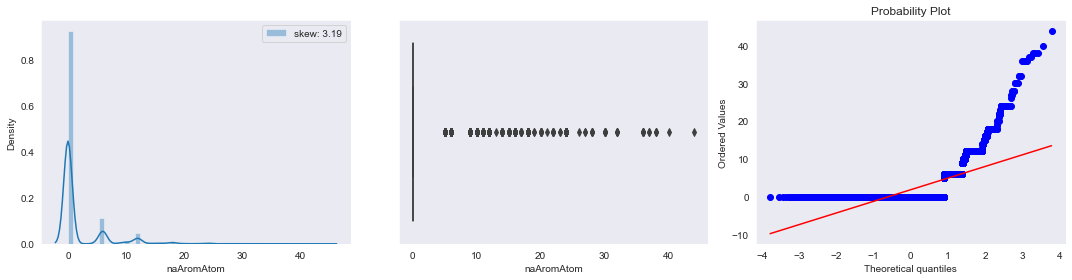

In [28]:
sns.set_style('dark')
for col in continues_features[1:5]: # this range can be changed to see all features 
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

Conclusion:
- Outliers detected
- variation in data spred, feature scaling is required

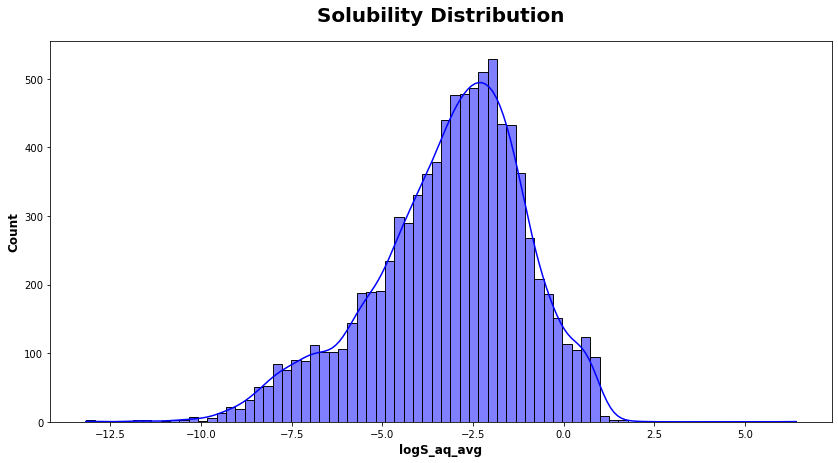

In [81]:
# Target feature univarient analysis

plt.subplots(figsize=(14,7))
sns.histplot(df.logS_aq_avg,  kde=True, color = 'b')
plt.title("Solubility Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("logS_aq_avg", weight="bold", fontsize=12)
plt.show()

### visualisation of categorical features

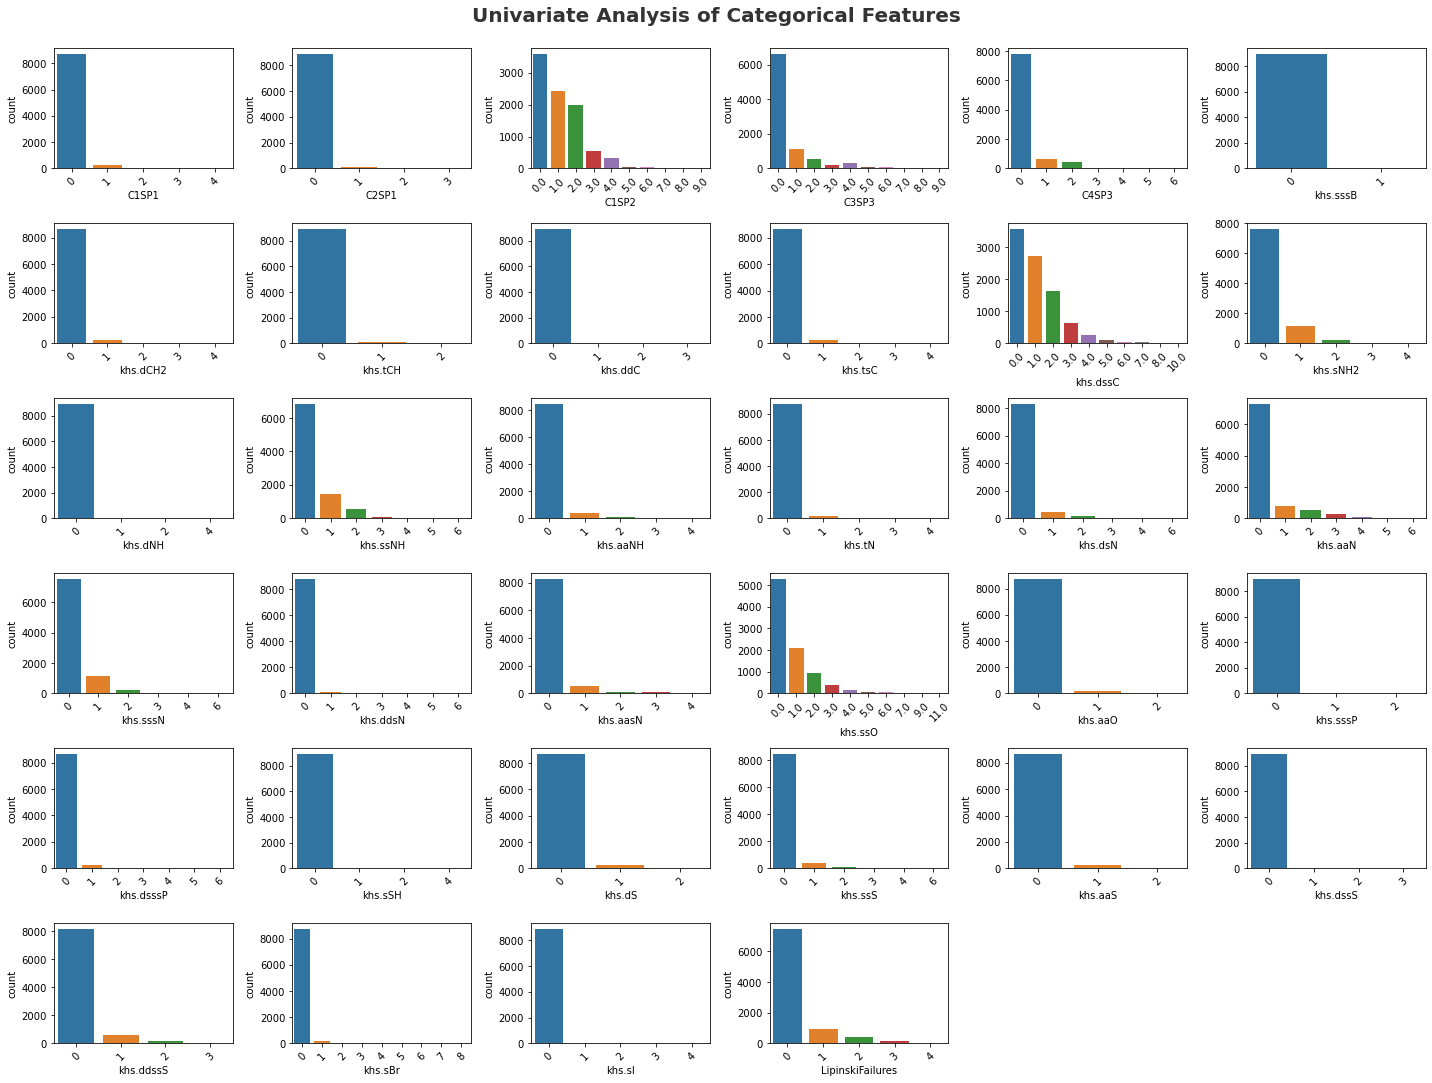

In [88]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(6, 6, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()